## Importação das bibliotecas e dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from math import sqrt

uri_filmes = 'https://raw.githubusercontent.com/oyurimatheus/clusterirng/master/movies/movies.csv'
filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
filmes.shape

(9742, 3)

In [3]:
generos = filmes.generos.str.get_dummies()

rename = {
    generos.columns[0] : 'sem_genero'
}

generos = generos.rename(columns = rename)

filmes = filmes.drop(columns = 'generos', axis = 1)
filmes = pd.concat([filmes, generos],axis = 1)

filmes.head()

,filme_id,titulo,sem_genero,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [5]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 28.02623  ,  37.83134  ],
       [ 42.710686 , -29.321657 ],
       [-19.031073 ,  48.966896 ],
       ...,
       [ -9.274433 ,  -9.36912  ],
       [ 52.493984 , -13.070986 ],
       [  6.5942187,  26.991835 ]], dtype=float32)

In [6]:
distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(generos_escalados)
    distortions.append(kmeanModel.inertia_)

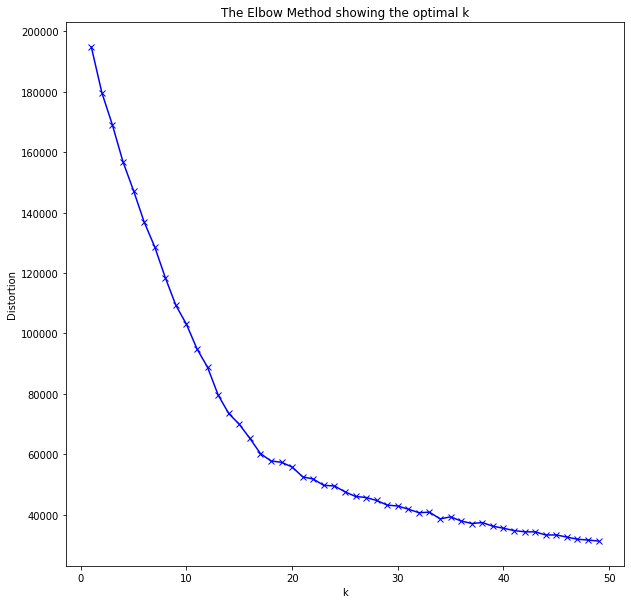

In [7]:
plt.figure(figsize=(10,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

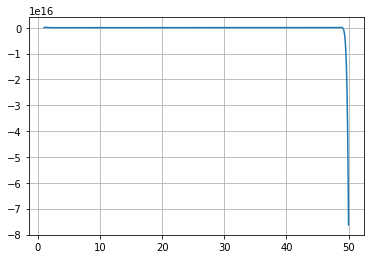

[ 1.          1.04904905  1.0980981   1.14714715  1.1961962   1.24524525
  1.29429429  1.34334334  1.39239239  1.44144144  1.49049049  1.53953954
  1.58858859  1.63763764  1.68668669  1.73573574  1.78478478  1.83383383
  1.88288288  1.93193193  1.98098098  2.03003003  2.07907908  2.12812813
  2.17717718  2.22622623  2.27527528  2.32432432  2.37337337  2.42242242
  2.47147147  2.52052052  2.56956957  2.61861862  2.66766767  2.71671672
  2.76576577  2.81481481  2.86386386  2.91291291  2.96196196  3.01101101
  3.06006006  3.10910911  3.15815816  3.20720721  3.25625626  3.30530531
  3.35435435  3.4034034   3.45245245  3.5015015   3.55055055  3.5995996
  3.64864865  3.6976977   3.74674675  3.7957958   3.84484484  3.89389389
  3.94294294  3.99199199  4.04104104  4.09009009  4.13913914  4.18818819
  4.23723724  4.28628629  4.33533534  4.38438438  4.43343343  4.48248248
  4.53153153  4.58058058  4.62962963  4.67867868  4.72772773  4.77677678
  4.82582583  4.87487487  4.92392392  4.97297297  5.

In [11]:
from pylab import *

# avalia o polinomio interpolador usando polinomios de Lagrange

def interpolL(x,T):
    S=0.0
    for i in range(len(T)):
        prod=1.0
        for j in range(len(T)):
            if j==i: continue
            prod=prod*(x-T[j][0])/(T[i][0]-T[j][0])
        S=S+T[i][1]*prod
    return S # A tabela eh uma lista de pares ordenados.

T = list(zip(list(K), distortions))
p= lambda x: interpolL(x,T) # define o polinomio interpolador p(x)

x=linspace(1,50,1000)
plot(x,p(x))
grid()
show()

print(x)
print(p(2.5))

In [13]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 50, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [28]:
optimal_number_of_clusters(distortions)

18

In [61]:
model = KMeans(n_clusters=18, random_state=5)
model.fit(generos_escalados)

print('Grupos {}'.format(model.labels_))

Grupos [ 4  4  1 ...  3 11  0]


In [62]:
clusters = pd.DataFrame(model.cluster_centers_, columns = generos.columns)
clusters.head()

,sem_genero,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,-0.271554,-0.248197,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.307012,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
1,-0.05918,-0.396293,-0.242927,-0.258679,-0.270451,0.496538,-0.325886,-0.217489,0.305670,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.278237,-0.477770,-0.20202,-0.132065
2,-0.05918,0.461663,0.079959,-0.258679,-0.270451,-0.595858,-0.374632,-0.217489,0.166593,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.272396,-0.334435,2.035586,-0.20202,-0.132065
3,-0.05918,-0.120392,-0.126881,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,0.948297,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
4,-0.05918,-0.169420,1.049673,1.460493,3.697524,0.379160,-0.323425,-0.217489,-0.588252,0.814684,-0.094926,-0.315396,-0.128397,-0.188419,-0.186432,-0.306279,-0.029943,-0.481813,-0.18276,-0.132065


In [63]:
def select_cluster(grupo):
    filtro = model.labels_ == grupo
    print(filtro)
    return filmes[filtro].head()

In [64]:
select_cluster(4)

[ True  True False ... False False False]


,filme_id,titulo,sem_genero,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,Tom and Huck (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,13,Balto (1995),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,27,Now and Then (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>,
       <AxesSubplot:title={'center':'15'}>,
       <AxesSubplot:title={'center':'16'}>,
       <AxesSubplot:title={'center':'17'}>], dtype=object)

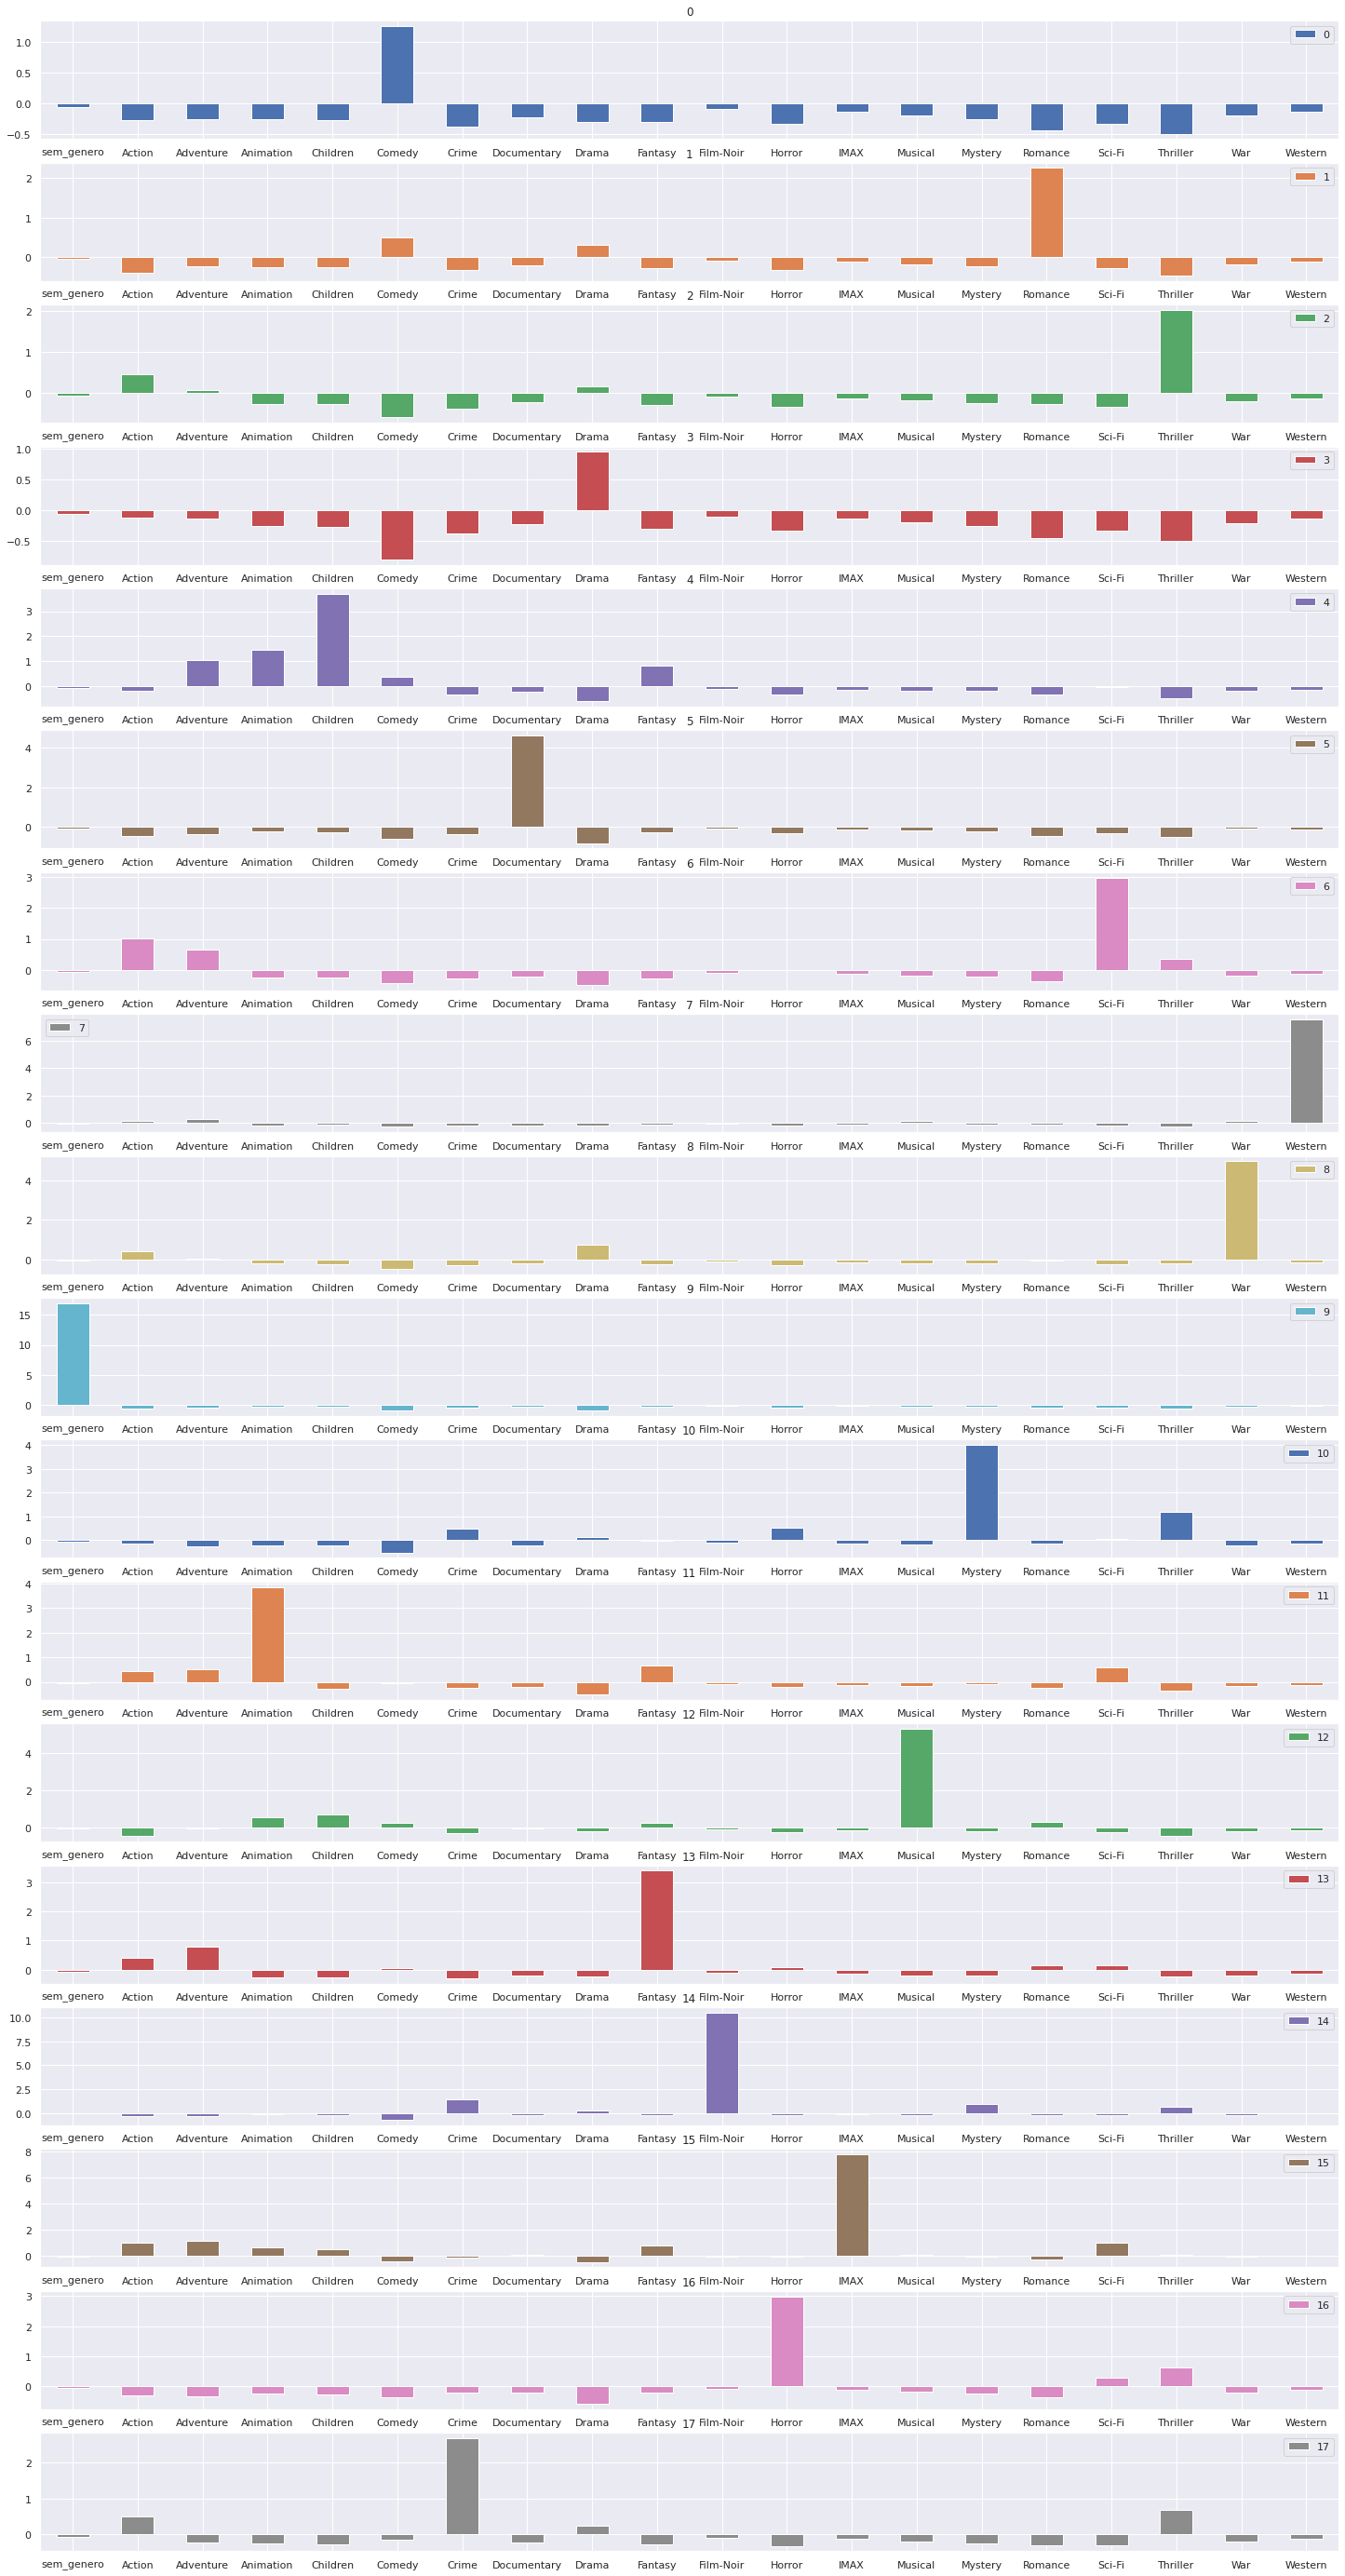

In [65]:
clusters.transpose().plot.bar(subplots=True,
                             sharex = False,
                             rot = 0,
                             figsize=(25,50))

<AxesSubplot:>

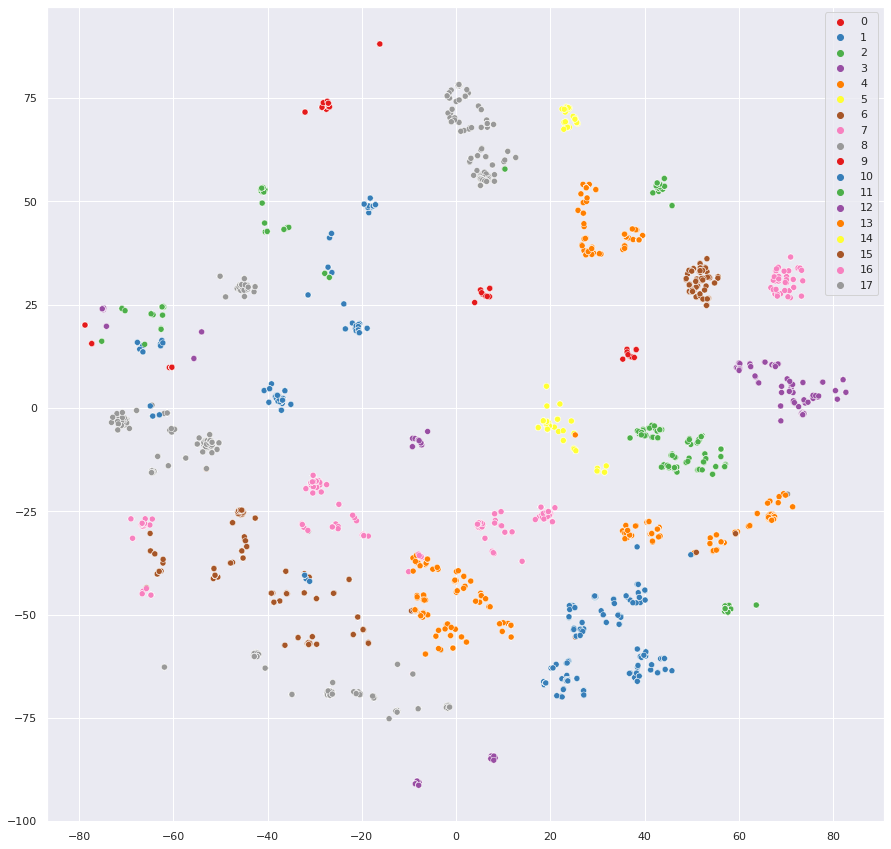

In [66]:
sns.scatterplot(x = visualizacao[:,0], y = visualizacao[:,1], hue = model.labels_, palette=sns.color_palette("Set1", 18))

In [67]:
from sklearn.cluster import AgglomerativeClustering

In [68]:
model = AgglomerativeClustering(n_clusters=18)
groups = model.fit_predict(generos_escalados)

In [69]:
tsne = TSNE()
visualization = tsne.fit_transform(generos_escalados)

<AxesSubplot:>

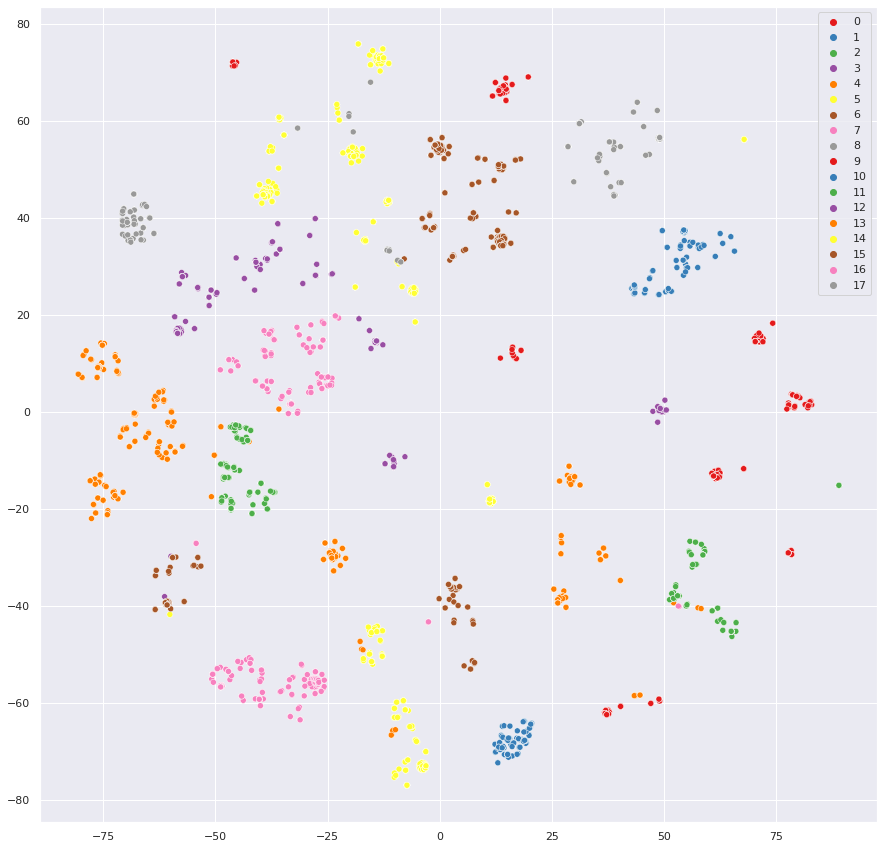

In [71]:
sns.set(rc={'figure.figsize':(15,15)})
sns.scatterplot(x = visualization[:,0], 
                y = visualization[:,1],  
                hue = groups, 
                palette = sns.color_palette("Set1", 18),
               )

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage

model = KMeans(n_clusters=18, random_state=5)
model.fit(generos_escalados)

KMeans(n_clusters=18, random_state=5)

{'icoord': [[165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [135.0, 135.0, 153.75, 153.75],
  [125.0, 125.0, 144.375, 144.375],
  [115.0, 115.0, 134.6875, 134.6875],
  [105.0, 105.0, 124.84375, 124.84375],
  [95.0, 95.0, 114.921875, 114.921875],
  [85.0, 85.0, 104.9609375, 104.9609375],
  [75.0, 75.0, 94.98046875, 94.98046875],
  [65.0, 65.0, 84.990234375, 84.990234375],
  [55.0, 55.0, 74.9951171875, 74.9951171875],
  [45.0, 45.0, 64.99755859375, 64.99755859375],
  [35.0, 35.0, 54.998779296875, 54.998779296875],
  [25.0, 25.0, 44.9993896484375, 44.9993896484375],
  [15.0, 15.0, 34.99969482421875, 34.99969482421875],
  [5.0, 5.0, 24.999847412109375, 24.999847412109375]],
 'dcoord': [[0.0, 2.415481185811477, 2.415481185811477, 0.0],
  [0.0, 2.7285677241327058, 2.7285677241327058, 2.415481185811477],
  [0.0, 2.8780548669499035, 2.8780548669499035, 2.7285677241327058],
  [0.0, 3.3811333953984692, 3.3811333953984692, 2.8780548669499035],
  [0.

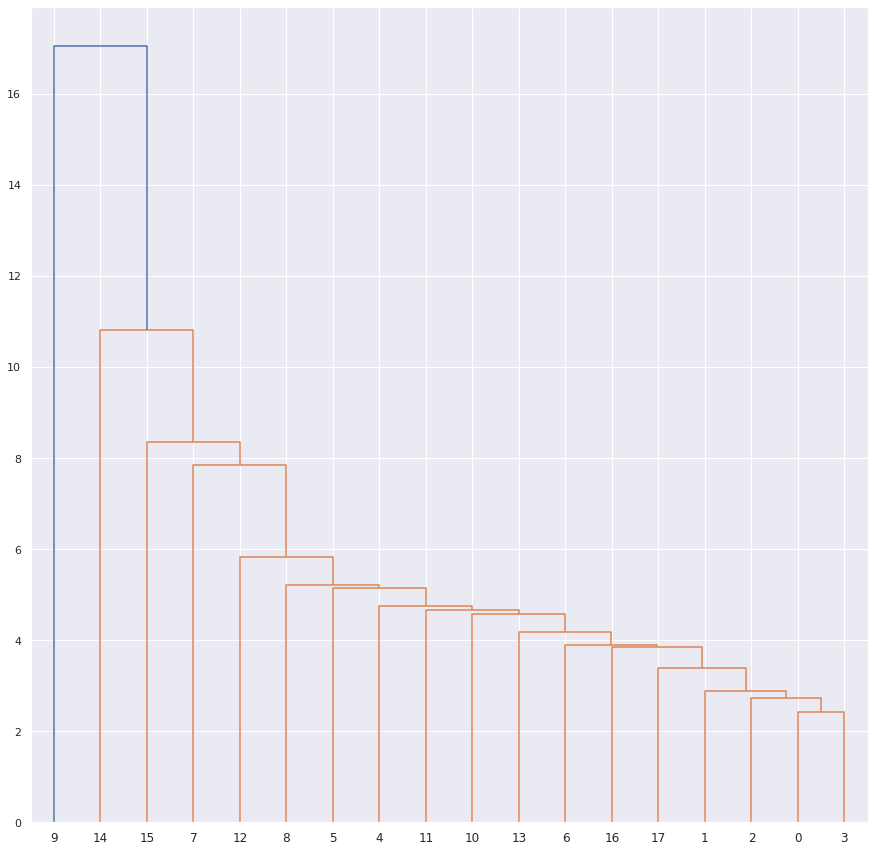

In [113]:
dendrogram(linkage(clusters))